In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/X-Note/study/iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
print(str(df.shape))
print(df.head)
print(df.describe().transpose())

(150, 6)
<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Ir

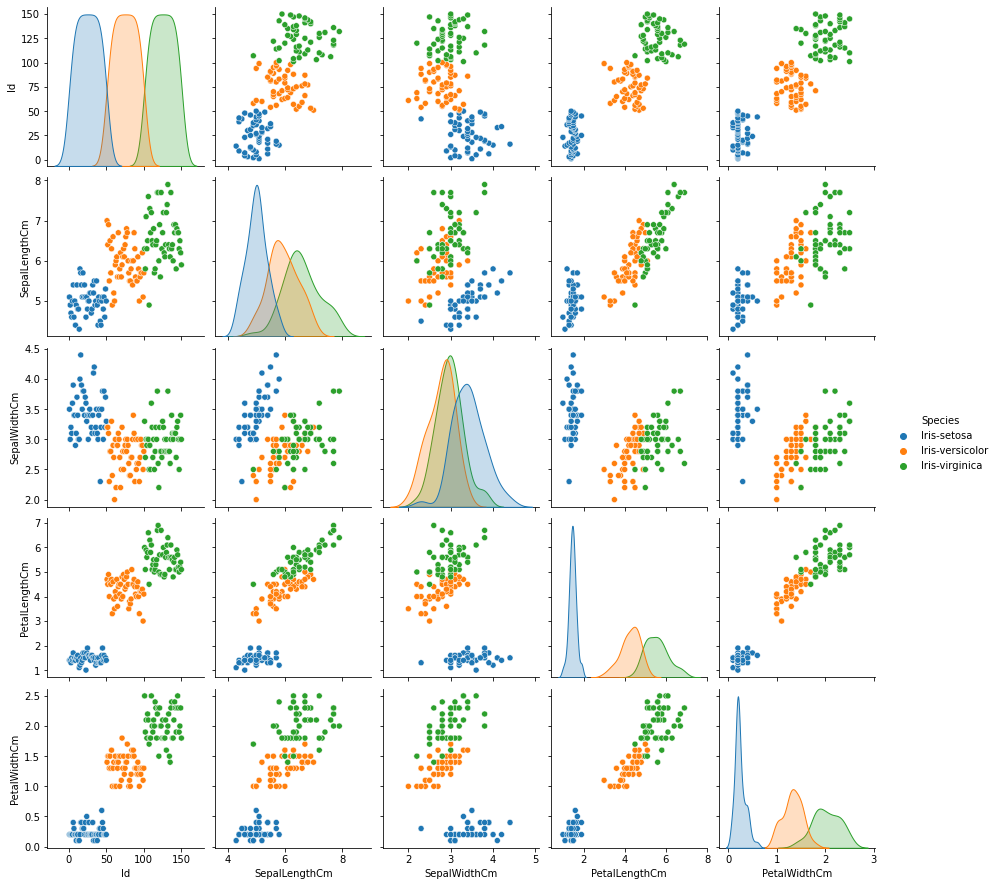

In [3]:
import seaborn as sns
sns.pairplot(df,hue='Species')

ValueError: Filled and line art markers cannot be mixed

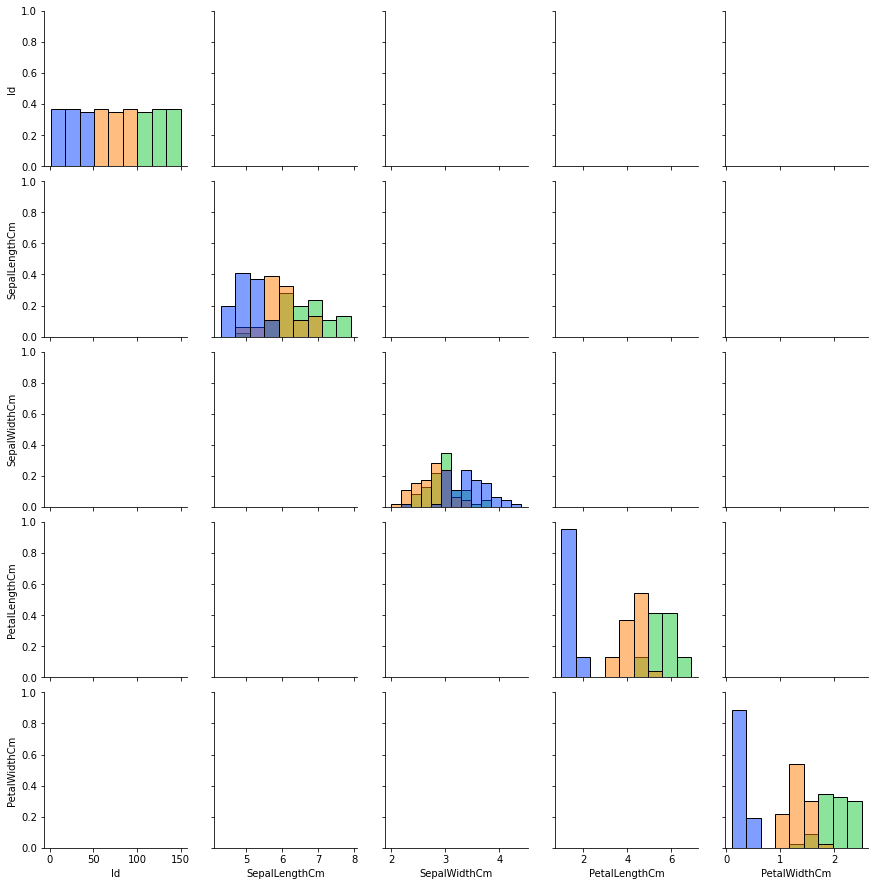

In [31]:
sns.pairplot(df,hue="Species",
             diag_kind="hist",palette="bright",markers=["o","x","v"])

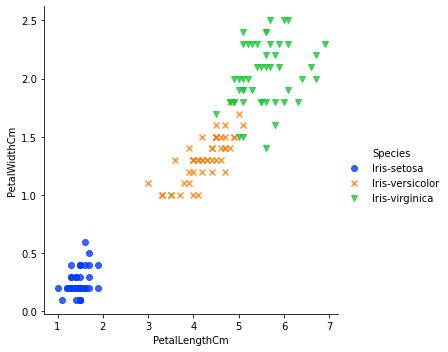

In [5]:
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm'
           ,hue="Species",data=df,fit_reg=False,palette='bright',markers=['o','x','v'])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

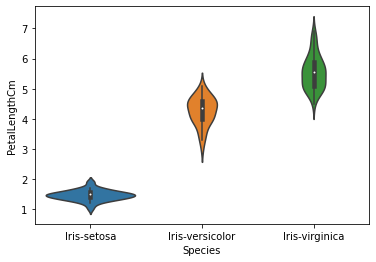

In [6]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
out_pca=pca.fit_transform(df[['SepalLengthCm',
                             'SepalWidthCm',
                             'PetalLengthCm',
                             'PetalWidthCm']])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

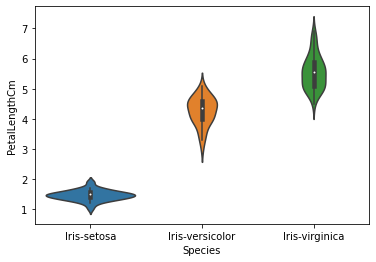

In [10]:
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
out_pca=pca.fit_transform(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [23]:
df_pca=pd.DataFrame(data=out_pca,columns=["pca1","pca2"])
print(df_pca.head())

       pca1      pca2
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925


       pca1      pca2      Species
0 -2.684207  0.326607  Iris-setosa
1 -2.715391 -0.169557  Iris-setosa
2 -2.889820 -0.137346  Iris-setosa
3 -2.746437 -0.311124  Iris-setosa
4 -2.728593  0.333925  Iris-setosa


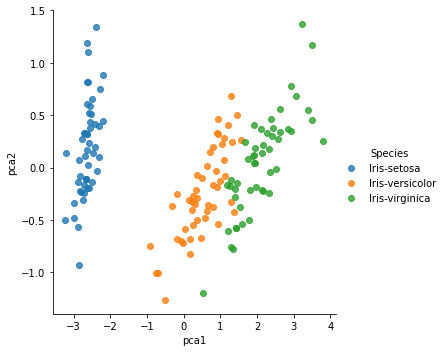

In [24]:
df_pca=pd.concat([df_pca,df[['Species']]],axis=1)
print(df_pca.head())
sns.lmplot(x="pca1",y="pca2",hue="Species",data=df_pca,fit_reg=False)

       lda1      lda2      Species
0  9.423452 -0.513976  Iris-setosa
1  8.751900 -1.591678  Iris-setosa
2  8.973004 -1.068204  Iris-setosa
3  8.170186 -1.435135  Iris-setosa
4  9.249789 -0.136869  Iris-setosa


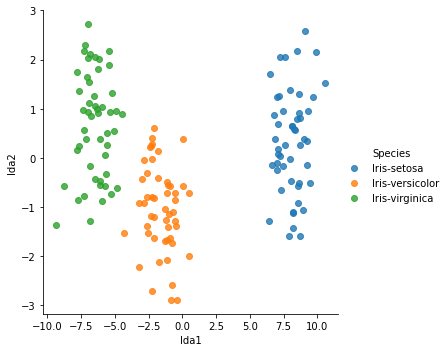

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
#format dataframe

out_lda=lda.fit_transform(X=df.iloc[:,:4],y=df['Species'])
df_lda=pd.DataFrame(data=out_lda,columns=['lda1','lda2'])
df_lda=pd.concat([df_lda,df[['Species']]],axis=1)
print(df_lda.head())
sns.lmplot(x="lda1",y="lda2",hue="Species",data=df_lda,fit_reg=False)


Text(0.5, 1.0, 'Violin plot: Feature=PCA_1')

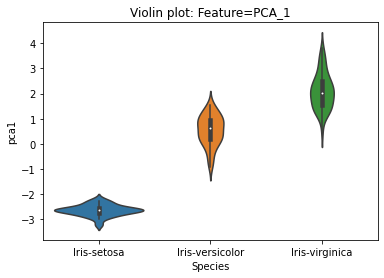

In [33]:
sns.violinplot(x='Species',y='pca1',data=df_pca).set_title("Violin plot: Feature=PCA_1")


Text(0.5, 1.0, 'Violin plot: Feature=LDA_1')

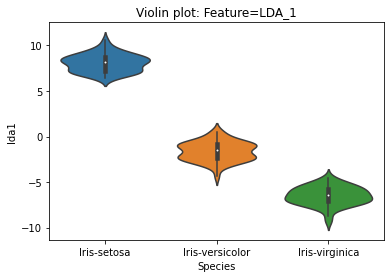

In [34]:
sns.violinplot(x='Species',y='lda1',data=df_lda).set_title("Violin plot: Feature=LDA_1")